<a href="https://colab.research.google.com/github/rotland/EDA-Stack-Overflow-Annual-Developer-Survey-2023-/blob/main/EDA(Stack_Overflow_Annual_Developer_Survey_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 EDA(Stack Overflow Annual Developer Survey 2023)

Analyzing responses from the Stack Overflow Annual Developer Survey 2023

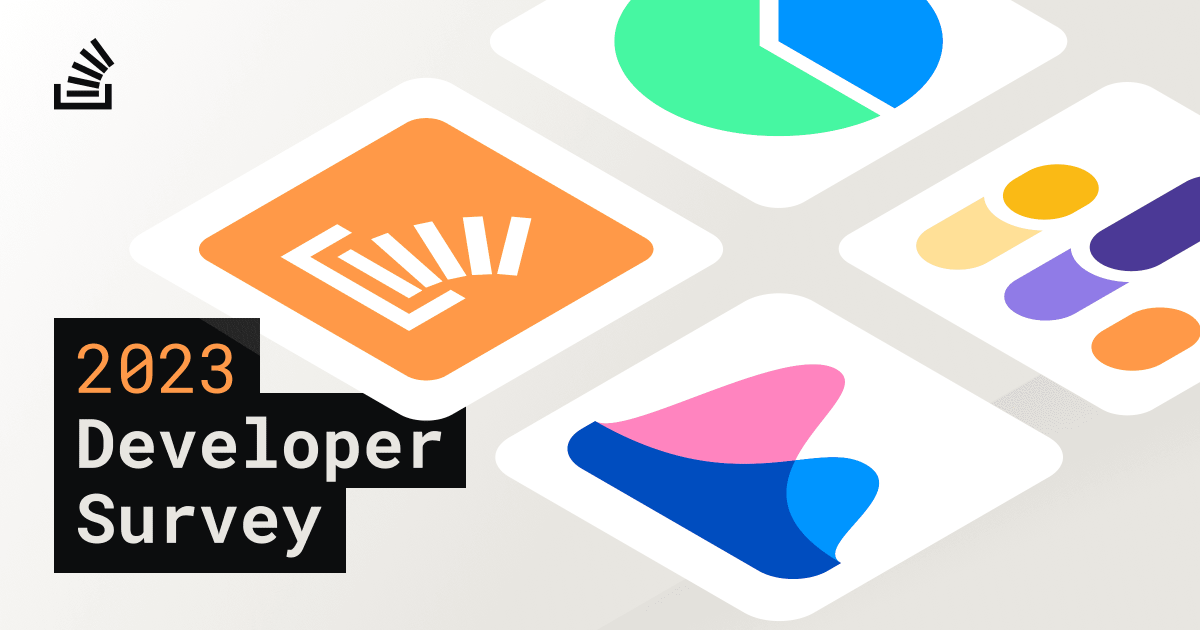

In [58]:
from PIL import Image
Image.open('2023.png')

# Intoduction

In the rapidly evolving landscape of technology and software development, understanding the perspectives, preferences, and challenges faced by developers is crucial for guiding industry trends, educational initiatives, and product development. A comprehensive survey was conducted by stackoverflow to gather data from developers worldwide and capture insights about their work environments, programming languages, tools, methodologies, and career aspirations.

OBJECTIVE

The task at hand is to perform a detailed analysis of the collected survey data to extract meaningful and actionable insights and  to practice my python skills learned on a structured data set including loading, inspecting, wrangling, exploring and drawing conclusion from data and have a deep understanding of the stackoverflow developer community .The notebook have the observation with each steps in order to explain throrougly how i approach the data set and based on observation some question are also answered.

Data source & dataset

 Name: "StackOverflow developer survey dataset"

* year: 2023

* description: The dataset contains responses to an annual survey conducted by StackOverflow on how developer learn and level up, which tools they're using, and which ones they want.. The dataset contains over 64,000 responses to 83 questions, from different countries around the world(although many questions are optional).

check more about Stack Overflow Annual Developer Survey:https://insights.stackoverflow.com/survey


The data set contains four files:

README_2023.txt - Information about the dataset

survey_results_schema.csv - The list of questions, and shortcodes for each question

survey_results_public.csv - The full list of responses to the questions

so_survey_2023.pdf - The summary/methodologies of how the survey was conducted.


I use survey_raw to name the data frame to indicate that its unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [59]:
# import the pandas & numpy library
import pandas as pd
import numpy as np


In [60]:
survey_raw = pd.read_csv('survey_results_public.csv')
survey_raw

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17672,17673,I agree,I am a developer by profession,45-54 years old,"Employed, full-time",In-person,Professional development or self-paced learnin...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,1-2 times a week,60-120 minutes a day,30-60 minutes a day,None of these,"Manufacturing, Transportation, or Supply Chain",Appropriate in length,Easy,40694.0
17673,17674,I agree,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,1-2 times a week,Never,1-2 times a week,30-60 minutes a day,30-60 minutes a day,Microservices;None of these,NaN,Appropriate in length,Neither easy nor difficult,NaN
17674,17675,I agree,I am a developer by profession,18-24 years old,"Independent contractor, freelancer, or self-em...",Remote,Hobby,Some college/university study without earning ...,Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,Never,Less than 15 minutes a day,Less than 15 minutes a day,Continuous integration (CI) and (more often) c...,"Information Services, IT, Software Development...",Appropriate in length,Easy,17504.0
17675,17676,I agree,I 

The dataset contains over 64,000 responses to 83 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

To view the list of columns in the data frame.

In [61]:
survey_raw.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

It appears that shortcodes for questions have been used as column names.

I can refer to the schema file to see the full text of each question. The schema file contains  six columns:


In [62]:
schema_name=pd.read_csv('/content/survey_results_schema.csv')
schema_name

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
...,...,...,...,...,...,...
73,QID289,Knowledge_7,Waiting on answers to questions often causes i...,NaN,MC,MAVR
74,QID289,Knowledge_8,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
75,QID290,Frequency_1,Needing help from people outside of your immed...,NaN,MC,MAVR
76,QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR


We can now use schema_name to retrieve the full question text for any column in survey_results_schema dataframe.



In [63]:
schema_name['question'][17]

'Which of the following describes your current job, the one you do most of the time? Please select only one.'

The data frame contains 78 rows, but only the first & last five rows are displayed by default with Jupyter for brevity. so to view all i use Ipyton.display finction.

In [64]:
from IPython.display import display
with pd.option_context('display.max_rows', 64000):
    display(schema_name)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
7,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
8,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
9,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR


The data is now loaded. We're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

There are seven sections in this suvery data_set S1 - S7.

1. Basic information

2. Education,work & career

3.  Technology & work culture

4. Stackoverflow usage + community

5. Artificial Inteligence

6. Pofessional developer series (optional)

7. Final Questions

# Data Preparation & Cleaning

While the survey responses contain a wealth of information, so i limit my analysis to the following areas:

1. Demographics of the survey respondents and the global programming community

2. Distribution of programming skills, experience, and preferences

3. Employment-related information, preferences, Industry and opinions

i selected a subset of columns with the relevant data for the analysis.

In [65]:
selected_columns = [
     'MainBranch',
     'Age',
     'Employment',
     'EdLevel',
     'YearsCode',
     'LearnCode',
     'YearsCodePro',
     'DevType',
     'LanguageHaveWorkedWith',
     'DatabaseHaveWorkedWith',
     'WebframeHaveWorkedWith',
     'Country',
     'Industry',
     'SOAccount',
  ]

To checck the total number of the new subset columns i created using the len function

In [66]:
len(selected_columns)

14

I extracted a copy of the data from these column into a new data frame survey_df. so that we can continue to modify without affecting the original datasets.

In [67]:
survey_df = survey_raw[selected_columns].copy()

In [68]:
survey_df

,MainBranch,Age,Employment,EdLevel,YearsCode,LearnCode,YearsCodePro,DevType,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,WebframeHaveWorkedWith,Country,Industry,SOAccount
0,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,Books / Physical media;Colleague;Friend or fam...,9,"Senior Executive (C-Suite, VP, etc.)",HTML/CSS;JavaScript;Python,Supabase,Next.js;React;Remix;Vue.js,United States of America,"Information Services, IT, Software Development...",Yes
2,I am a developer by profession,45-54 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,Books / Physical media;Colleague;On the job tr...,23,"Developer, back-end",Bash/Shell (all shells);Go,NaN,NaN,United States of America,"Information Services, IT, Software Development...",Yes
3,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,Colleague;Friend or family member;Other online...,7,"Developer, front-end",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,PostgreSQL;Redis,Node.js;React;Ruby on Rails;Vue.js;WordPress,United States of America,NaN,Yes
4,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Books / Physical media;Online Courses or Certi...,4,"Developer, full-stack",HTML/CSS;JavaScript;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Express;Gatsby;NestJS;Next.js;Node.js;React,Philippines,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17672,I am a developer by profession,45-54 years old,"Employed, full-time",Some college/university study without earning ...,16,Books / Physical media;On the job training;Oth...,15,"Developer, desktop or enterprise applications",Python;SQL,IBM DB2,NaN,Italy,"Manufacturing, Transportation, or Supply Chain",Yes
17673,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Online Courses or Certification;Other online r...,5,"Engineer, data",HTML/CSS;JavaScript;SQL;TypeScript,MariaDB;Microsoft SQL Server;MongoDB;MySQL;Pos...,Drupal;Express;jQuery;Node.js,India,NaN,Yes
17674,I am a developer by profession,18-24 years old,"Independent contractor, freelancer, or self-em...",Some college/university study without earning ...,8,Online Courses or Certification;Other online r...,3,Blockchain,HTML/CSS;JavaScript;PowerShell;Rust;SQL;TypeSc...,Cloud Firestore;MongoDB;MySQL;PostgreSQL;Redis,Express;Node.js;Nuxt.js;React;Vue.js,Pakistan,"Information Services, IT, Software Development...",Yes
17675,I am a developer by profession,35-44 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,Books / Physical media;Colleague;Friend or fam...,9,"Developer, full-stack",C#,Microsoft SQL Server,NaN,Netherlands,"Information Services, IT, Software Development...",Yes


Let's view some basic information about the the new data frame (survey_df).

In [69]:
survey_df.shape

(17677, 14)

In [70]:
# explore the data
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17677 entries, 0 to 17676
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   MainBranch              17677 non-null  object
 1   Age                     17677 non-null  object
 2   Employment              17493 non-null  object
 3   EdLevel                 17506 non-null  object
 4   YearsCode               17417 non-null  object
 5   LearnCode               17439 non-null  object
 6   YearsCodePro            13553 non-null  object
 7   DevType                 15656 non-null  object
 8   LanguageHaveWorkedWith  17351 non-null  object
 9   DatabaseHaveWorkedWith  14684 non-null  object
 10  WebframeHaveWorkedWith  13262 non-null  object
 11  Country                 17506 non-null  object
 12  Industry                7860 non-null   object
 13  SOAccount               17499 non-null  object
dtypes: object(14)
memory usage: 1.9+ MB


I need to deal with the the empty values by manually adjusting the Datatype for each column on a cases-by-case basis. since, Most columns have the data type object, either because they contain values of different types or contain empty values (NaN). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (1187).

None of the column was detected as numeric columns. Age, yearscode, YearsCodePro columns supposed to be a numeric datatype but becuase they aslo contain string so pandas refefered to them as object.


To confirm the information in the yearcodepro column

i used  the unique() function to check if the data is numeric or string.

In [71]:
schema_name['question'][22]

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [72]:
survey_df.YearsCodePro.unique()

array([nan, '9', '23', '7', '4', '21', '3', '15', 'Less than 1 year',
       '10', '2', '6', '14', '5', '19', '13', '16', '28', '1', '30', '11',
       '8', '25', '32', '24', '40', '17', '45', '29', '12', '31', '20',
       '18', '50', '27', '43', '22', '26', '38', '33', '44', '35', '34',
       '37', '42', '41', 'More than 50 years', '47', '36', '39', '48',
       '46', '49'], dtype=object)

So To make our analysis easier, I convert the columns into numeric data types using the pd.to_numeric function in python.

 while ignoring any non-numeric value. The non-numeric are converted to NaN.

check more about pandas.to_numeric function:

 https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

In [73]:
# coverting the Datatype and ignoring any non numeric value
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [74]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17677 entries, 0 to 17676
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              17677 non-null  object 
 1   Age                     17677 non-null  object 
 2   Employment              17493 non-null  object 
 3   EdLevel                 17506 non-null  object 
 4   YearsCode               17235 non-null  float64
 5   LearnCode               17439 non-null  object 
 6   YearsCodePro            13218 non-null  float64
 7   DevType                 15656 non-null  object 
 8   LanguageHaveWorkedWith  17351 non-null  object 
 9   DatabaseHaveWorkedWith  14684 non-null  object 
 10  WebframeHaveWorkedWith  13262 non-null  object 
 11  Country                 17506 non-null  object 
 12  Industry                7860 non-null   object 
 13  SOAccount               17499 non-null  object 
dtypes: float64(2), object(12)
memory usage

Let's now view some basic statistics about numeric columns.

In [75]:
survey_df.describe()

,YearsCode,YearsCodePro
count,17235.000000,13218.000000
mean,13.916391,10.949160
std,9.633623,8.408824
min,1.000000,1.000000
25%,7.000000,5.000000
50%,11.000000,9.000000
75%,20.000000,15.000000
max,50.000000,50.000000


In [76]:
survey_df.describe()

,YearsCode,YearsCodePro
count,17235.000000,13218.000000
mean,13.916391,10.949160
std,9.633623,8.408824
min,1.000000,1.000000
25%,7.000000,5.000000
50%,11.000000,9.000000
75%,20.000000,15.000000
max,50.000000,50.000000


We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.



In [77]:
survey_df.sample(10)

,MainBranch,Age,Employment,EdLevel,YearsCode,LearnCode,YearsCodePro,DevType,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,WebframeHaveWorkedWith,Country,Industry,SOAccount
16622,I am a developer by profession,35-44 years old,"Employed, full-time;Independent contractor, fr...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",20.0,Colleague;On the job training,13.0,"Developer, back-end",PHP,MariaDB;Redis,Spring Boot;Symfony;WordPress,Spain,NaN,Yes
15350,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time","Associate degree (A.A., A.S., etc.)",26.0,On the job training;Other online resources (e....,21.0,Designer,Groovy;HTML/CSS;Java;JavaScript;PHP;Ruby;SQL,Elasticsearch;MariaDB;MySQL,jQuery;Node.js;WordPress,Finland,NaN,Not sure/can't remember
1017,I am a developer by profession,25-34 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",19.0,Colleague;Online Courses or Certification;On t...,11.0,"Developer, back-end",HTML/CSS;Java;Python;Scala;SQL;TypeScript,Elasticsearch;H2;MariaDB;MongoDB;MySQL;Redis;Solr,Angular;FastAPI;Play Framework,France,Retail and Consumer Services,Yes
11082,"I am not primarily a developer, but I write co...",25-34 years old,"Student, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8.0,Books / Physical media;Other online resources ...,NaN,NaN,Assembly;Bash/Shell (all shells);C;MATLAB;OCam...,NaN,NaN,Hungary,NaN,No
11295,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,Colleague;Online Courses or Certification;On t...,2.0,"Developer, front-end",HTML/CSS;JavaScript;PowerShell;Python;R;TypeSc...,Microsoft SQL Server;MongoDB;MySQL;Redis;Supabase,Laravel;Node.js;Nuxt.js;Vue.js,Syrian Arab Republic,"Information Services, IT, Software Development...",Yes
2768,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4.0,Online Courses or Certification;On the job tra...,NaN,"Developer, back-end",Assembly;Bash/Shell (all shells);C;C#;C++;Java...,MariaDB;MySQL;SQLite,Spring Boot,Romania,"Information Services, IT, Software Development...",Not sure/can't remember
7882,I am a developer by profession,25-34 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14.0,Books / Physical media;Colleague;Online Course...,2.0,"Developer, back-end",Bash/Shell (all shells);Java;Python;TypeScript,PostgreSQL,Spring Boot,Australia,Financial Services,Yes
1707,I am a developer by profession,55-64 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",45.0,Books / Physical media;On the job training;Sch...,40.0,"Developer, back-end",Bash/Shell (all shells);C;C++;Perl;SQL,NaN,NaN,United States of America,"Information Services, IT, Software Development...",Yes
7396,I am a developer by profession,55-64 years old,"Employed, full-time","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",35.0,Books / Physical media;Online Courses or Certi...,7.0,"Senior Executive (C-Suite, VP, etc.)",Bash/Shell (all shells);Java;Python,Dynamodb,NaN,United States of America,Healthcare,Yes
12311,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15.0,Books / Physical media;Colleague;Friend or fam...,6.0,"Developer, full-stack",Assembly;Bash/Shell (all shells);C;C#;C++;HTML...,BigQuery;Cloud Firestore;Cockroachdb;DuckDB;Fi...,Angular;AngularJS;ASP.NET;Blazor;Django;FastAP...,Malaysia,"Information Services, IT, Software Development...",Yes


# Exploratory Analysis and Visualization

**Demographics**

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some selection bias i.e all participants are not equally balanced or objectively represented when doing the sampling. If the selection bias is not taken into account, then some conclusions of the study may be false.


check more about selection bias:

https://en.wikipedia.org/wiki/Selection_bias

Let's begin by importing matplotlib.pyplot and seaborn.

In [78]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Country**

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [79]:
schema_name['question'][22]

'Where do you live? <span style="font-weight: bolder;">*</span>'

In other to check for the total number of country according to the response, we us the nunique() function.

Pandas dataframe.nunique() function returns a Series with a number of distinct observations over the requested axis.

In [80]:
survey_df.Country.nunique()

153

i  cannot plot to show the entire 111 countries so i used the value_counts method to just view the top 15 countries.

to  identify the countries with the highest number of respondents i used  the ***value_counts*** method.



In [81]:
survey_df.Country.value_counts()

United States of America                                2579
Germany                                                 1659
India                                                   1239
United Kingdom of Great Britain and Northern Ireland    1037
Australia                                                678
                                                        ... 
Guinea                                                     1
Sierra Leone                                               1
Belize                                                     1
Swaziland                                                  1
Cameroon                                                   1
Name: Country, Length: 153, dtype: int64

In [82]:
# top 15 countries
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States of America                                2579
Germany                                                 1659
India                                                   1239
United Kingdom of Great Britain and Northern Ireland    1037
Australia                                                678
France                                                   630
Netherlands                                              535
Poland                                                   532
Canada                                                   501
Italy                                                    461
Spain                                                    411
Sweden                                                   340
Switzerland                                              267
Turkey                                                   250
Brazil                                                   247
Name: Country, dtype: int64

I visualize this information using a bar chart.

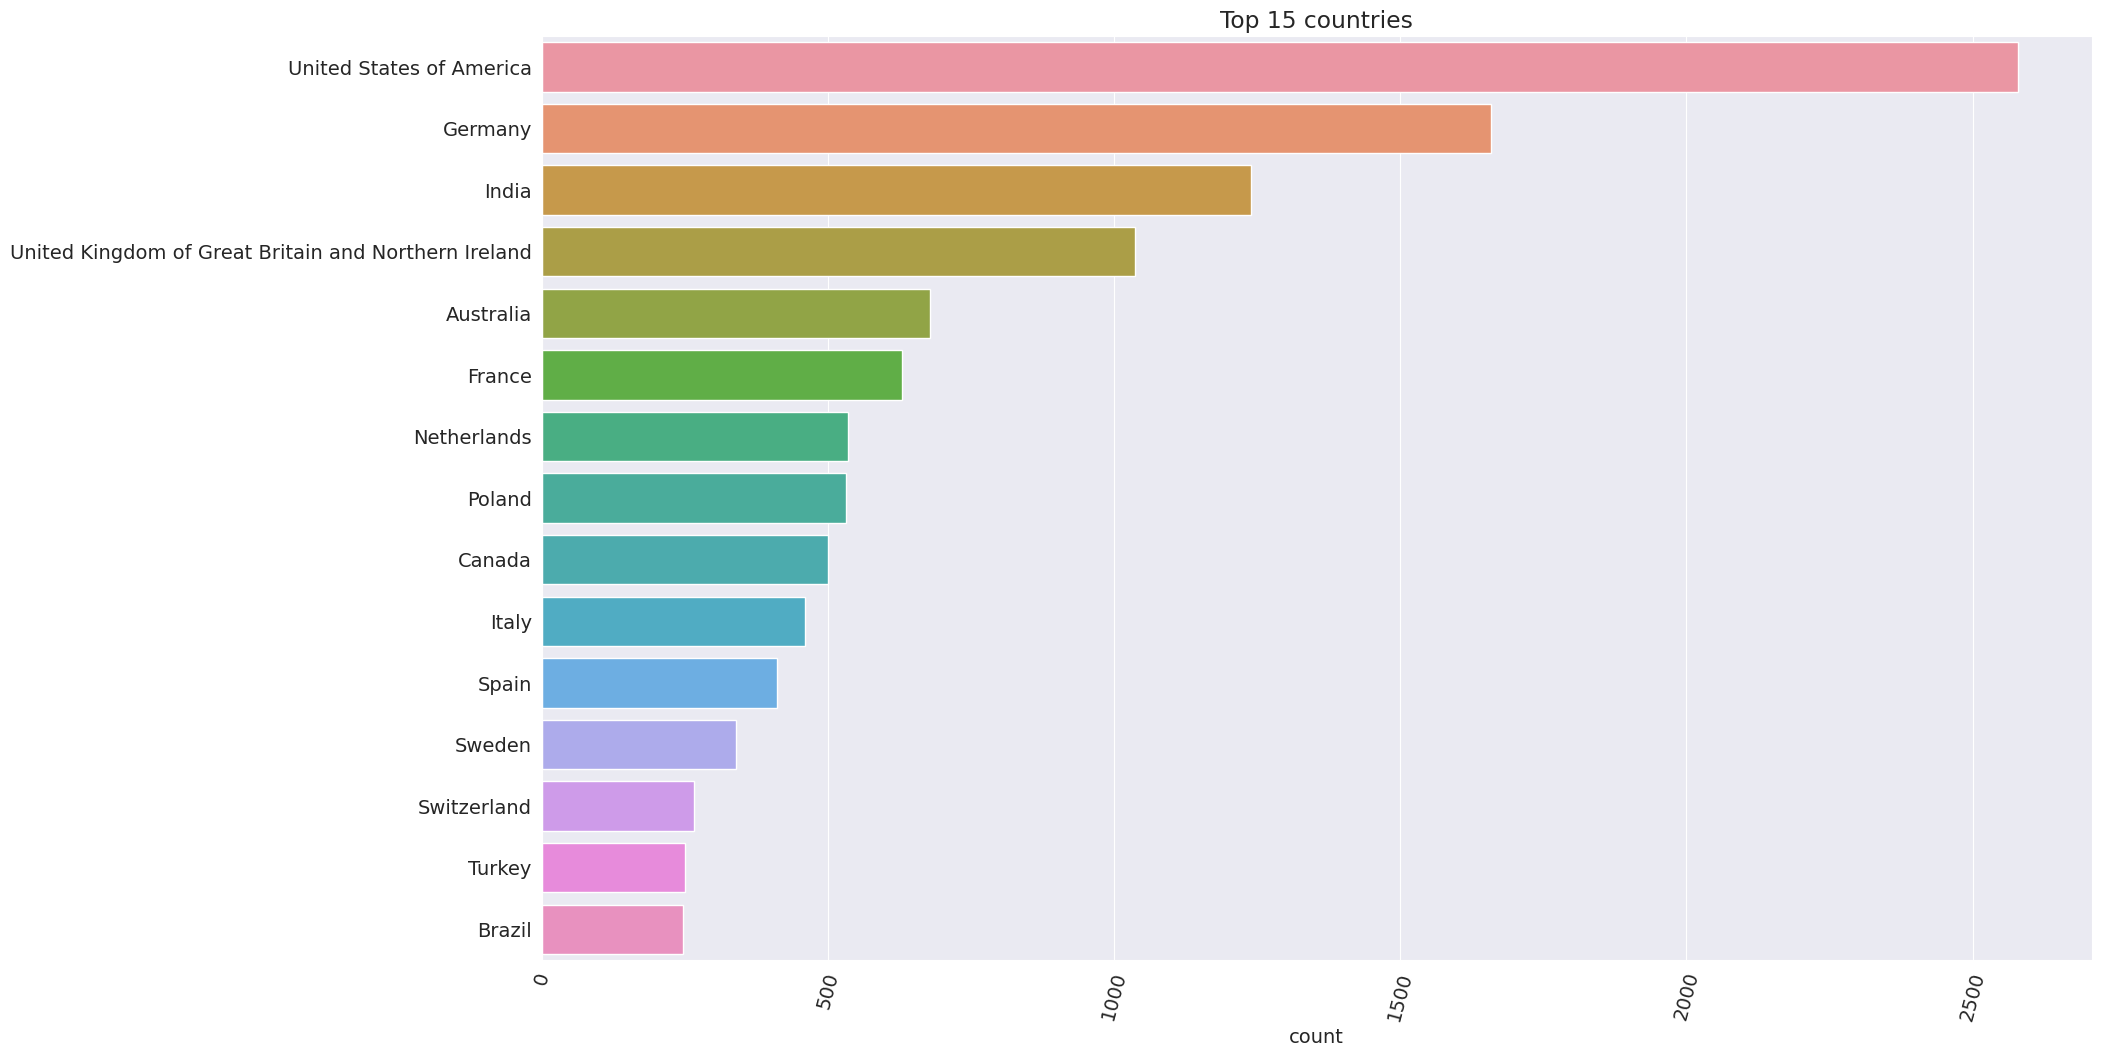

In [83]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=75)
sns.barplot(x=top_countries,y=top_countries.index)
plt.title("Top 15 countries")
plt.xlabel('count');

It appears that a disproportionately high number of respondents are from the USA, Germany and UK, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

 **Age**

The distribution of respondents' age is another crucial factor to look at.

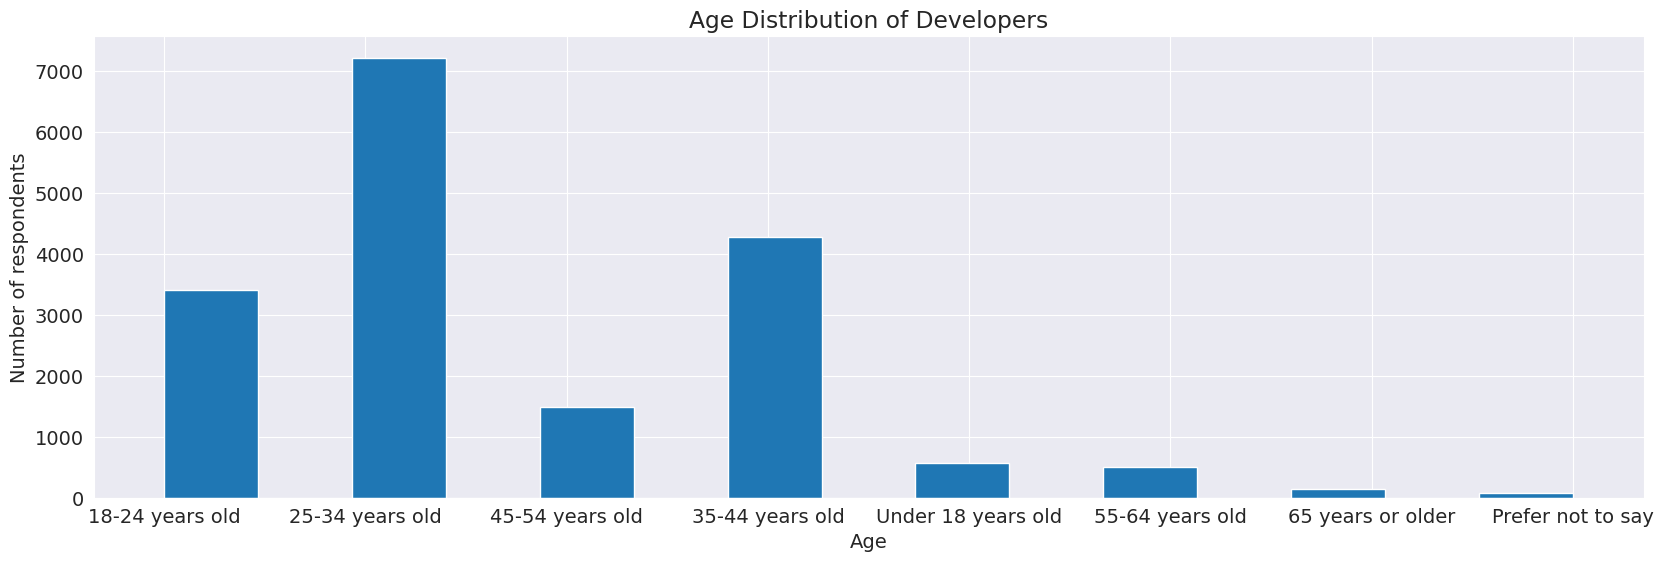

In [84]:
plt.figure(figsize=(20, 6))
plt.title("Age Distribution of Developers")
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age,bins=15);

It appears that a large percentage of respondents are 25-34 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

**Education**

**Education Level**

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming.

 Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.



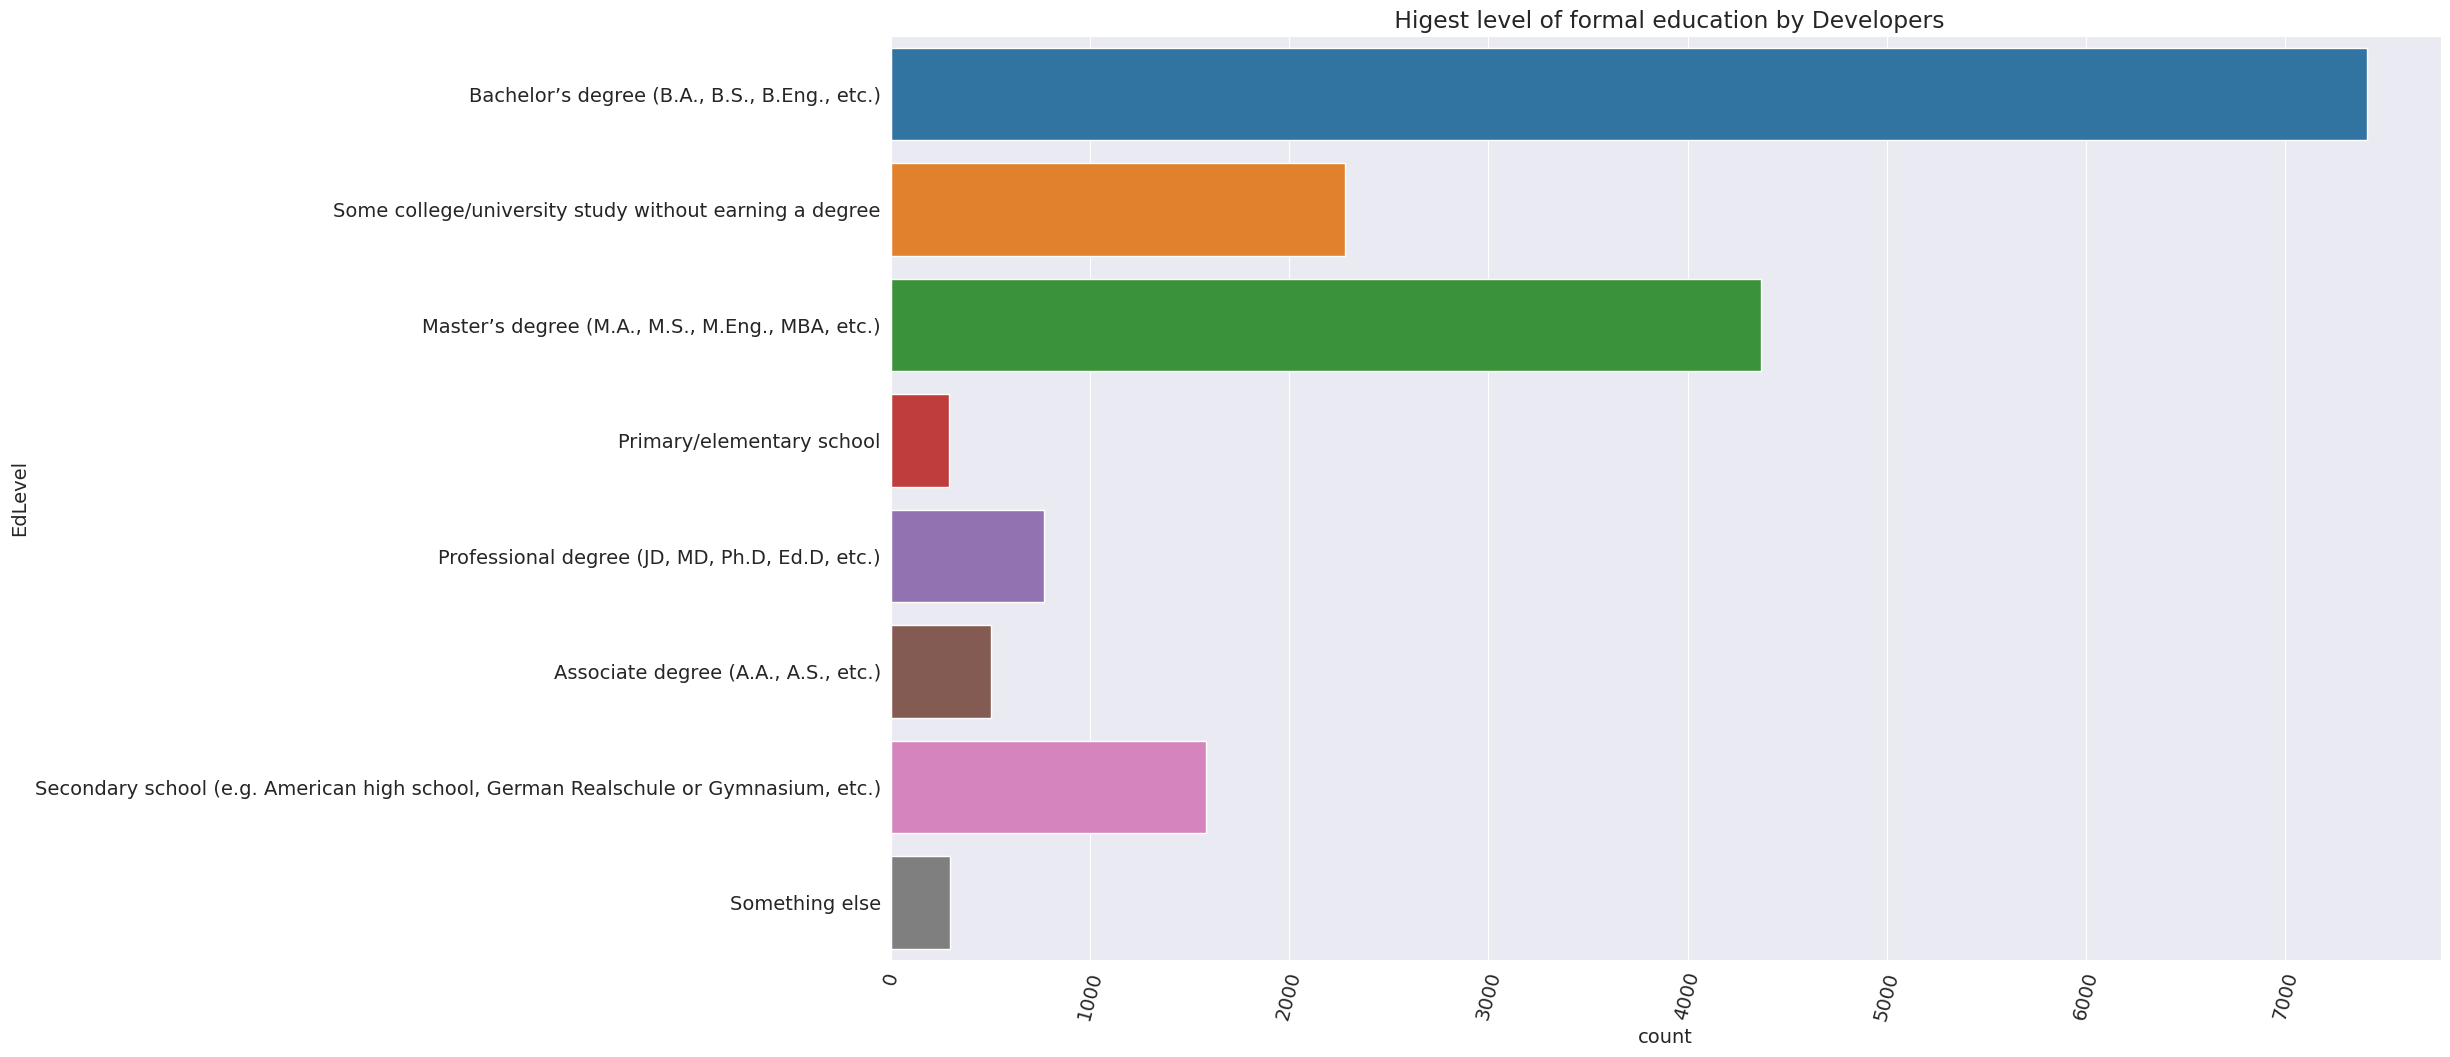

In [85]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=75);
plt.title(" Higest level of formal education by Developers")
plt.ylabel(None)
sns.countplot(y=survey_df.EdLevel);

from the the graph we plotted, over 1400 responded that they have bachelors degree,

so i plot a graph showing the percenteage of respondent according to their level of education.



In other to get the percentage i devide the uniquecount of Edlevel with the total count of respondent then * 100

In [86]:
top_degree=survey_df.EdLevel.value_counts() * 100 / survey_df.EdLevel.count()
top_degree

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          42.316920
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       24.940021
Some college/university study without earning a degree                                13.035531
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     9.048326
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         4.392780
Associate degree (A.A., A.S., etc.)                                                    2.890438
Something else                                                                         1.690849
Primary/elementary school                                                              1.685137
Name: EdLevel, dtype: float64

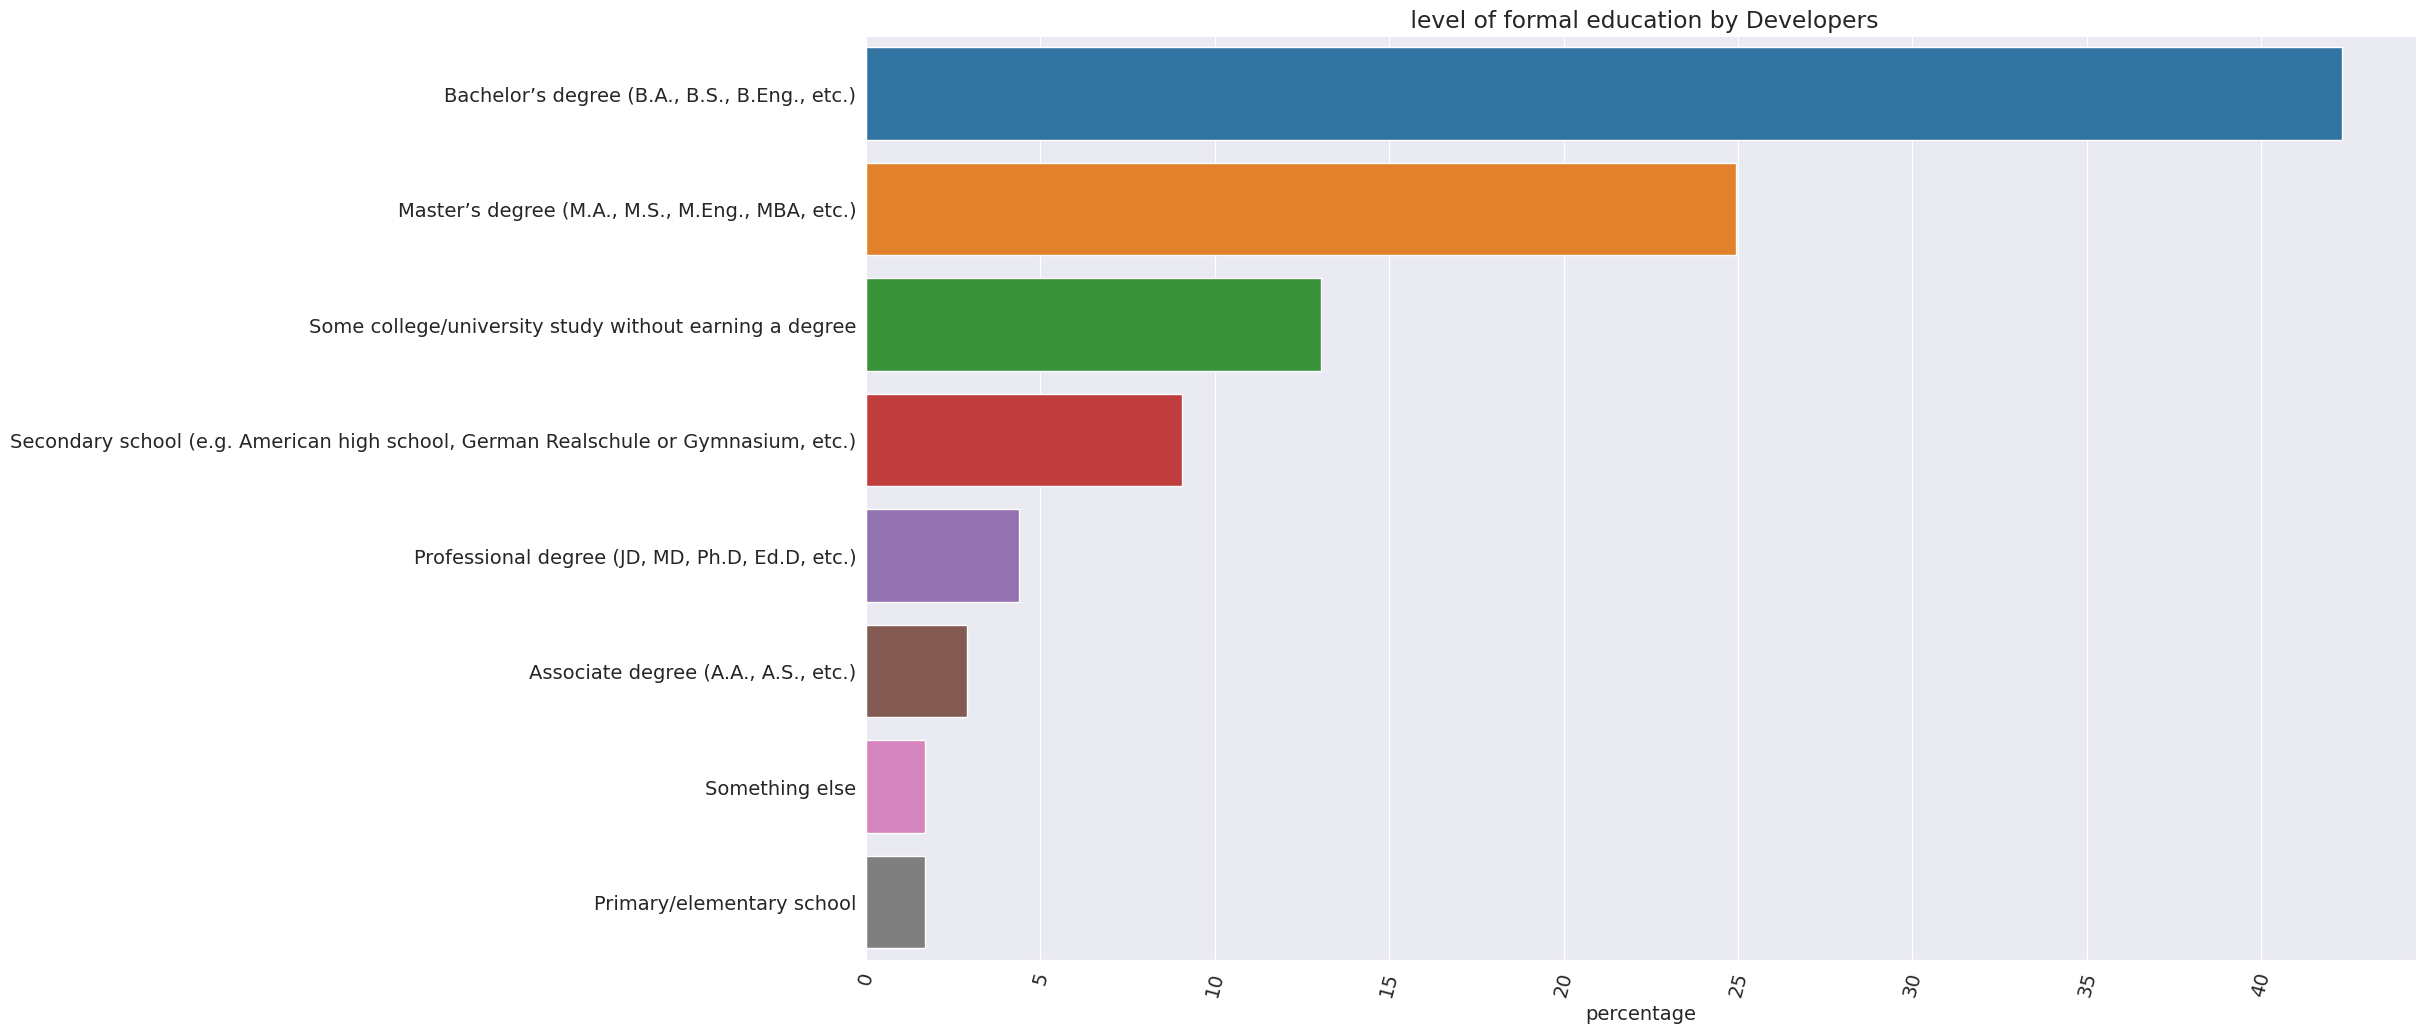

In [87]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=75)
sns.barplot(x=top_degree, y=top_degree.index)
plt.title(" level of formal education by Developers")
plt.xlabel('percentage');

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.
and also we have more than 10% of respondet from college and high school who only finish seconadary and high school, which is very encouraging. It seems to suggest that while a college education is helpful in general.

**Employment**

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the Employment column.

In [88]:
schema_name['question'][7]

'Which of the following best describes your current employment status? Select all that apply.'

In [89]:
survey_df.Employment.nunique()

65

The Employment field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon ;, making it a bit harder to analyze directly.

In [90]:
survey_df.Employment.value_counts()

Employed, full-time                                                                                                                                   10924
Independent contractor, freelancer, or self-employed                                                                                                   1547
Student, full-time                                                                                                                                     1252
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                873
Not employed, but looking for work                                                                                                                      513
                                                                                                                                                      ...  
Independent contractor, freelancer, or self-employed;Student, pa

I defined a helper function that turns a column containing lists of values (like survey_df.Employment) into a data frame with one column for each possible option.



In [91]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [92]:
emp_type_df = split_multicolumn(survey_df.Employment)
emp_type_df

<ipython-input-91-26a445763b0d>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value  in col_series[col_series.notnull()].iteritems():


,"Employed, full-time","Independent contractor, freelancer, or self-employed","Not employed, but looking for work","Student, full-time","Employed, part-time","Student, part-time",I prefer not to say,Retired,"Not employed, and not looking for work"
0,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
17672,True,False,False,False,False,False,False,False,False
17673,True,False,False,False,False,False,False,False,False
17674,False,True,False,False,False,False,False,False,False
17675,True,False,False,False,False,False,False,False,False


The emp_type_df has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is True. Otherwise, it is False.



In [93]:
Employee_total=emp_type_df.mean().sort_values(ascending=False)*100
Employee_total

Employed, full-time                                     70.011880
Independent contractor, freelancer, or self-employed    16.603496
Student, full-time                                      11.653561
Employed, part-time                                      5.543927
Not employed, but looking for work                       4.542626
Student, part-time                                       3.795893
Not employed, and not looking for work                   1.363354
Retired                                                  0.605306
I prefer not to say                                      0.475194
dtype: float64

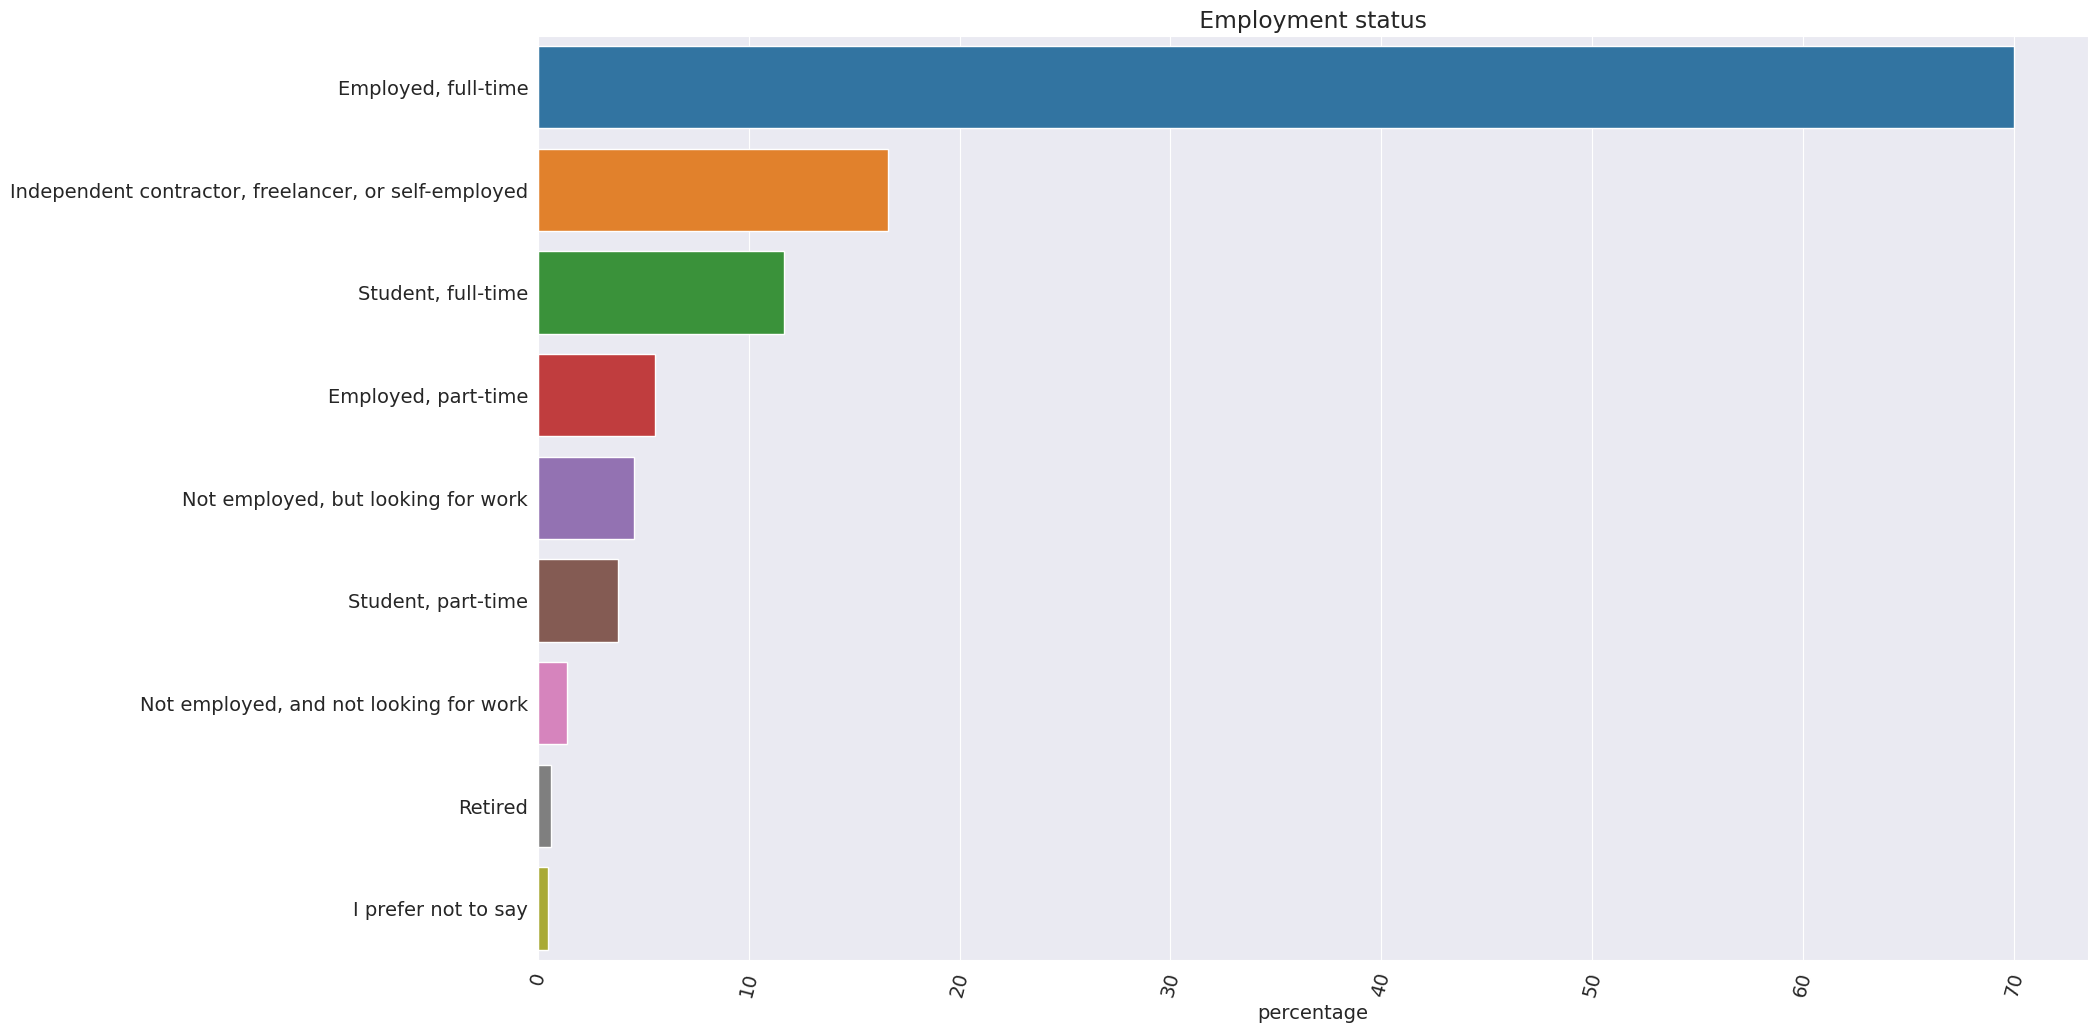

In [94]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=75)
sns.barplot(x=Employee_total, y=Employee_total.index)
plt.title(" Employment status ")
plt.xlabel('percentage');


As one might expect, the most common Employment statusis full-time(employed).

**Developer roles**

**DevType**

The DevType field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon ;, making it a bit harder to analyze directly.

In [95]:
schema_name['question'][17]

'Which of the following describes your current job, the one you do most of the time? Please select only one.'

In [96]:
survey_df.DevType.nunique()

33

In [97]:
dev_total=survey_df.DevType.value_counts(normalize=True, ascending=False)*100
dev_total

Developer, full-stack                            33.514308
Developer, back-end                              19.027849
Developer, front-end                              6.553398
Developer, desktop or enterprise applications     4.675524
Developer, mobile                                 3.896270
Other (please specify):                           3.493868
Developer, embedded applications or devices       2.637966
Engineering manager                               2.376086
Student                                           2.280276
Academic researcher                               2.024783
Research & Development role                       1.948135
Data scientist or machine learning specialist     1.877874
DevOps specialist                                 1.782064
Engineer, data                                    1.718191
Senior Executive (C-Suite, VP, etc.)              1.667092
Developer, game or graphics                       1.283853
Cloud infrastructure engineer                     1.2646

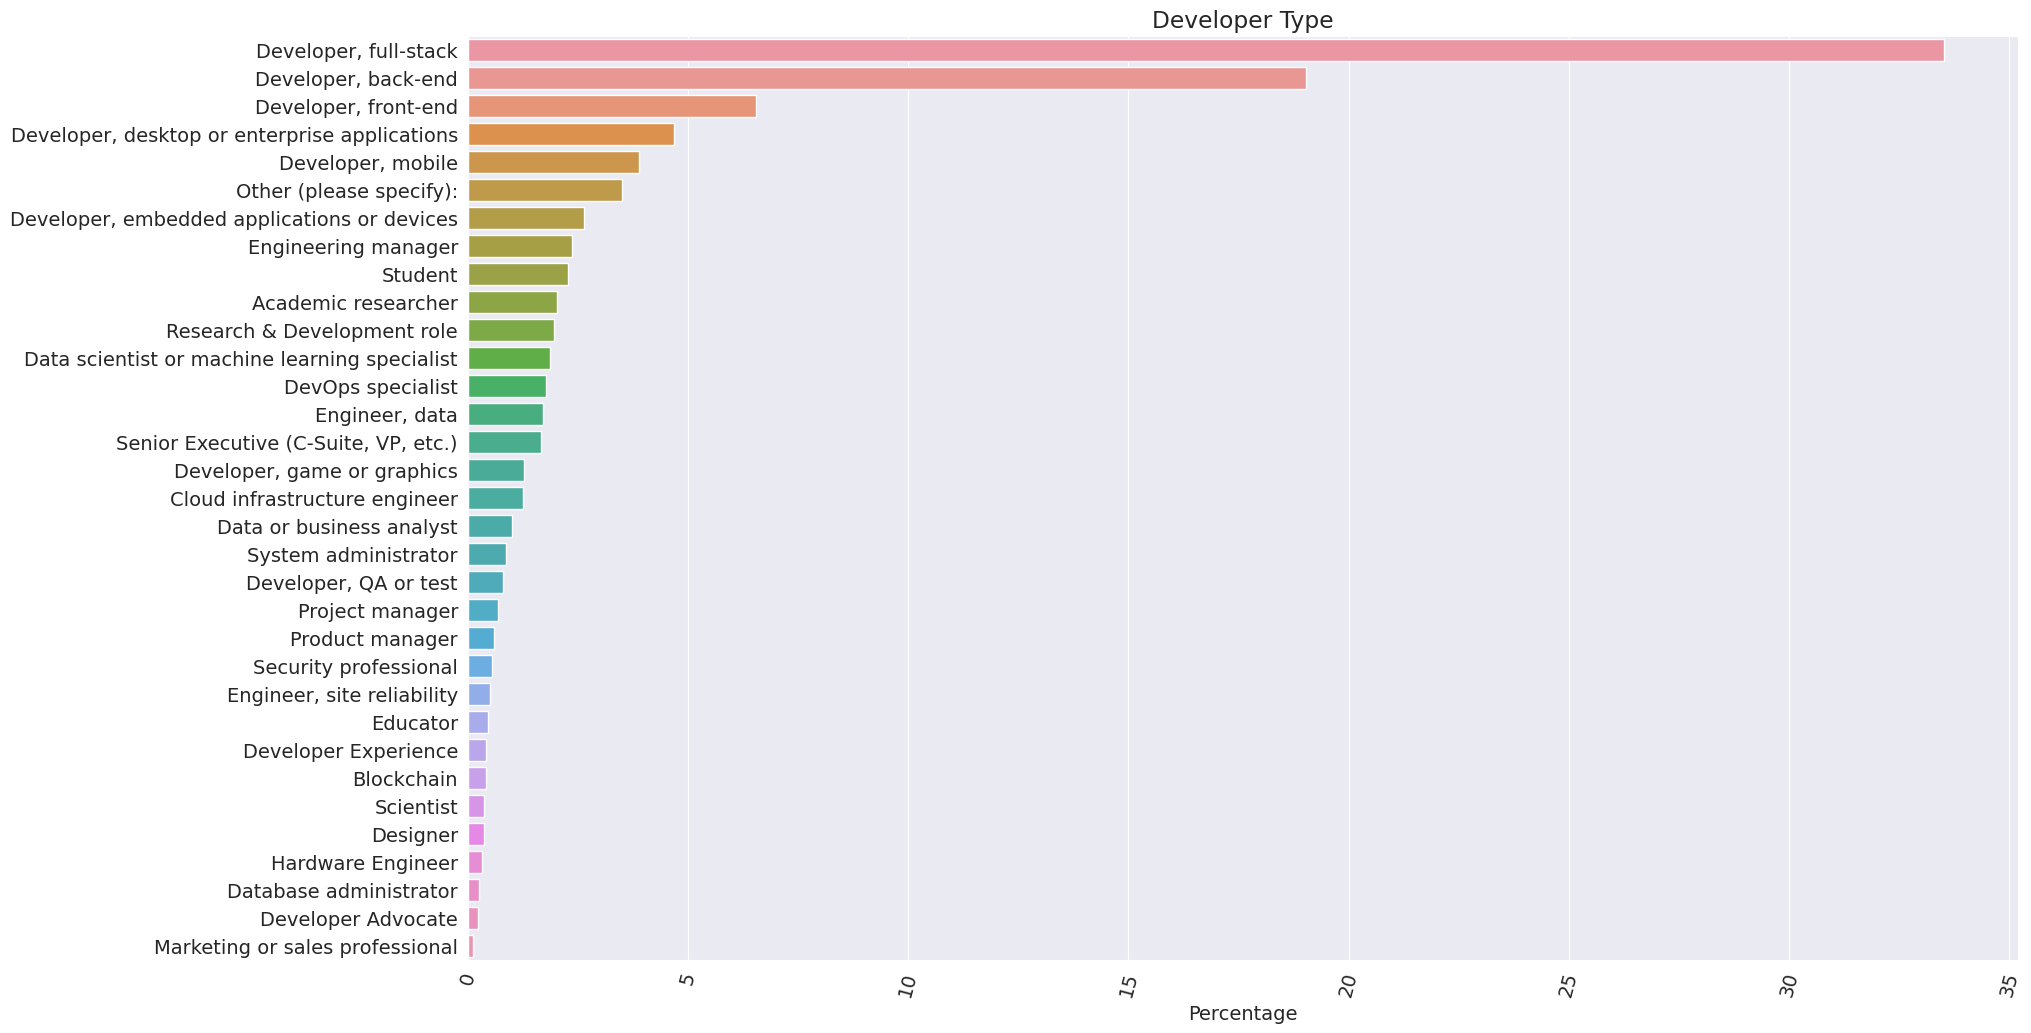

In [98]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=75)
sns.barplot(x=dev_total, y=dev_total.index)
plt.title("Developer Type")
plt.xlabel('Percentage');


As one might expect, the most common roles include "Developer" in the name.
we have a large percentage of respondent from the role of fullstack developer, followed by backend and frontend.
we also have 2 penrcentage of people working in the role of a data scientist according to the respondent in the developer community.



**Industry**

The industry developer worked  is another factor we need to consider. The industry field contain information about the industry respondent work for. the company is categorized i.e IT companies,oil & Gas, Healthcare software development e.t,c.

In [99]:
schema_name['question'][62]

'What industry is the company you work for in?'

In [100]:
survey_df.Industry.nunique()

12

In [101]:
Industry_total=survey_df.Industry.value_counts(normalize=True, ascending=False)*100
Industry_total

Information Services, IT, Software Development, or other Technology    50.763359
Financial Services                                                     11.437659
Other                                                                  10.903308
Manufacturing, Transportation, or Supply Chain                          6.908397
Healthcare                                                              5.750636
Retail and Consumer Services                                            5.356234
Higher Education                                                        3.244275
Advertising Services                                                    2.137405
Insurance                                                               1.603053
Legal Services                                                          0.687023
Oil & Gas                                                               0.687023
Wholesale                                                               0.521628
Name: Industry, dtype: float

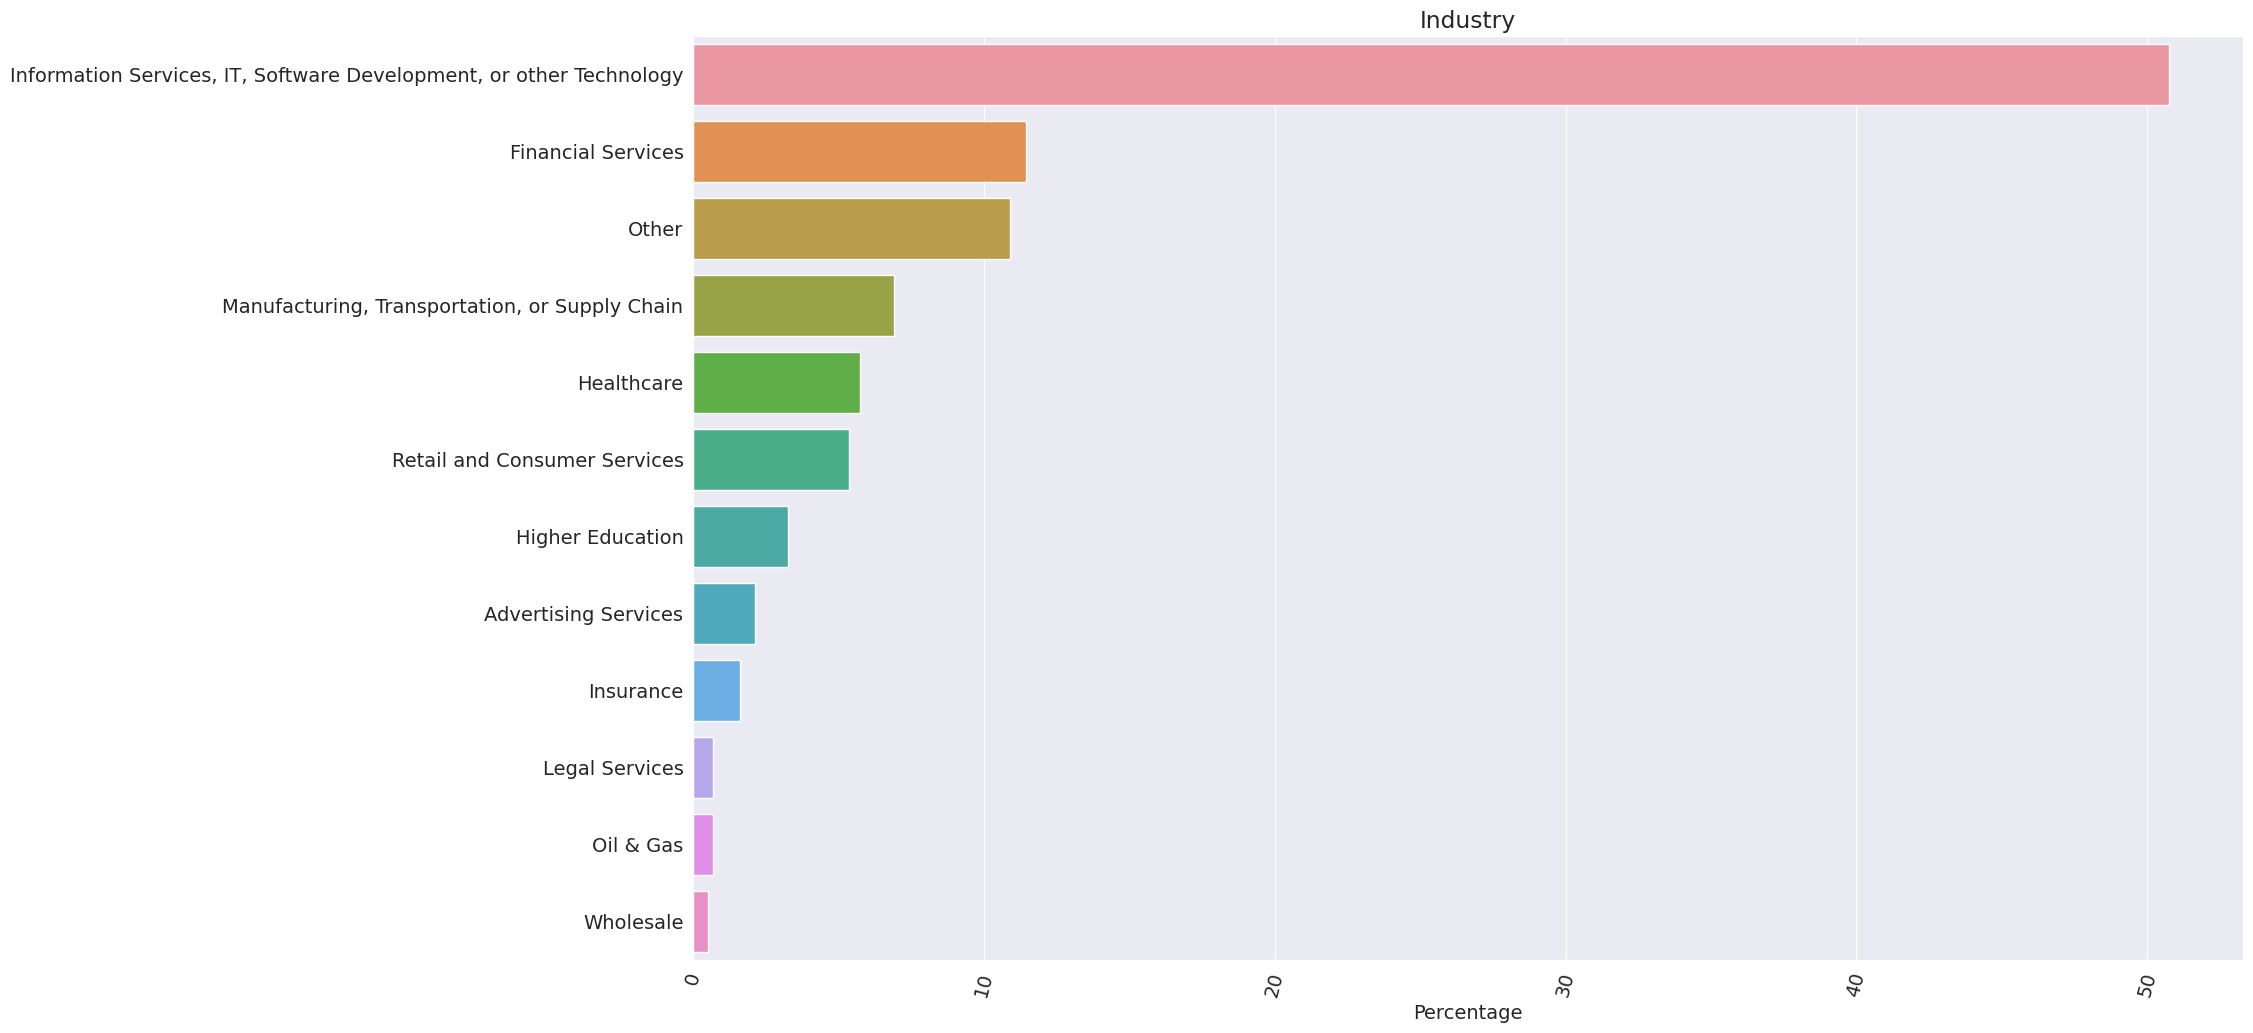

In [102]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=75)
sns.barplot(x=Industry_total, y=Industry_total.index)
plt.title("Industry")
plt.xlabel('Percentage');

From our Graph we can see that IT and Software developtment have the highest number of devlopers working in the IT industry(47%).
The financial services company which also have over 10%.


The supplly chain Industry & health almost have same percentage of developers working in the industry.
some developers didnt respond because their company might not in the categorized industry.

**Technology**

I've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset.
lets gain more insight by asking some specific questions and try to answer them using data frame operations and visualizations.

**Q: What are the most popular programming languages in 2023?**

To answer this,  we can use the LanguageWorkedWith column, respondents were allowed to choose multiple options here.

In [103]:
survey_df.LanguageHaveWorkedWith

0                                                      NaN
1                               HTML/CSS;JavaScript;Python
2                               Bash/Shell (all shells);Go
3        Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
4                           HTML/CSS;JavaScript;TypeScript
                               ...                        
17672                                           Python;SQL
17673                   HTML/CSS;JavaScript;SQL;TypeScript
17674    HTML/CSS;JavaScript;PowerShell;Rust;SQL;TypeSc...
17675                                                   C#
17676    Bash/Shell (all shells);HTML/CSS;JavaScript;Py...
Name: LanguageHaveWorkedWith, Length: 17677, dtype: object

Respondents chose multiple columns, so i need to seperate columnn using the split_column function.


In [104]:
languages_worked_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)
languages_worked_df

<ipython-input-91-26a445763b0d>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value  in col_series[col_series.notnull()].iteritems():


,HTML/CSS,JavaScript,Python,Bash/Shell (all shells),Go,PHP,Ruby,SQL,TypeScript,Ada,...,GDScript,Crystal,Cobol,Fortran,Prolog,Erlang,Apex,SAS,Nim,Flow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,True,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17672,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
17673,True,True,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
17674,True,True,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
17675,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 51 languages were included among the options. i aggregate these to identify the percentage of respondents who selected each language.

In [105]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript                 62.193811
HTML/CSS                   51.117271
Python                     48.090739
SQL                        47.536347
TypeScript                 39.124286
Java                       31.413701
Bash/Shell (all shells)    31.164790
C#                         28.353227
C++                        23.046897
C                          19.539515
PHP                        19.024721
Rust                       15.658766
PowerShell                 13.260169
Go                         13.090457
Kotlin                      9.735815
Dart                        6.087006
Ruby                        5.634440
Assembly                    5.379872
Lua                         4.955592
Swift                       4.853765
R                           3.993890
Visual Basic (.Net)         3.914691
MATLAB                      3.580924
Groovy                      3.479097
VBA                         3.264129
Scala                       3.060474
Objective-C                 2.375969
H

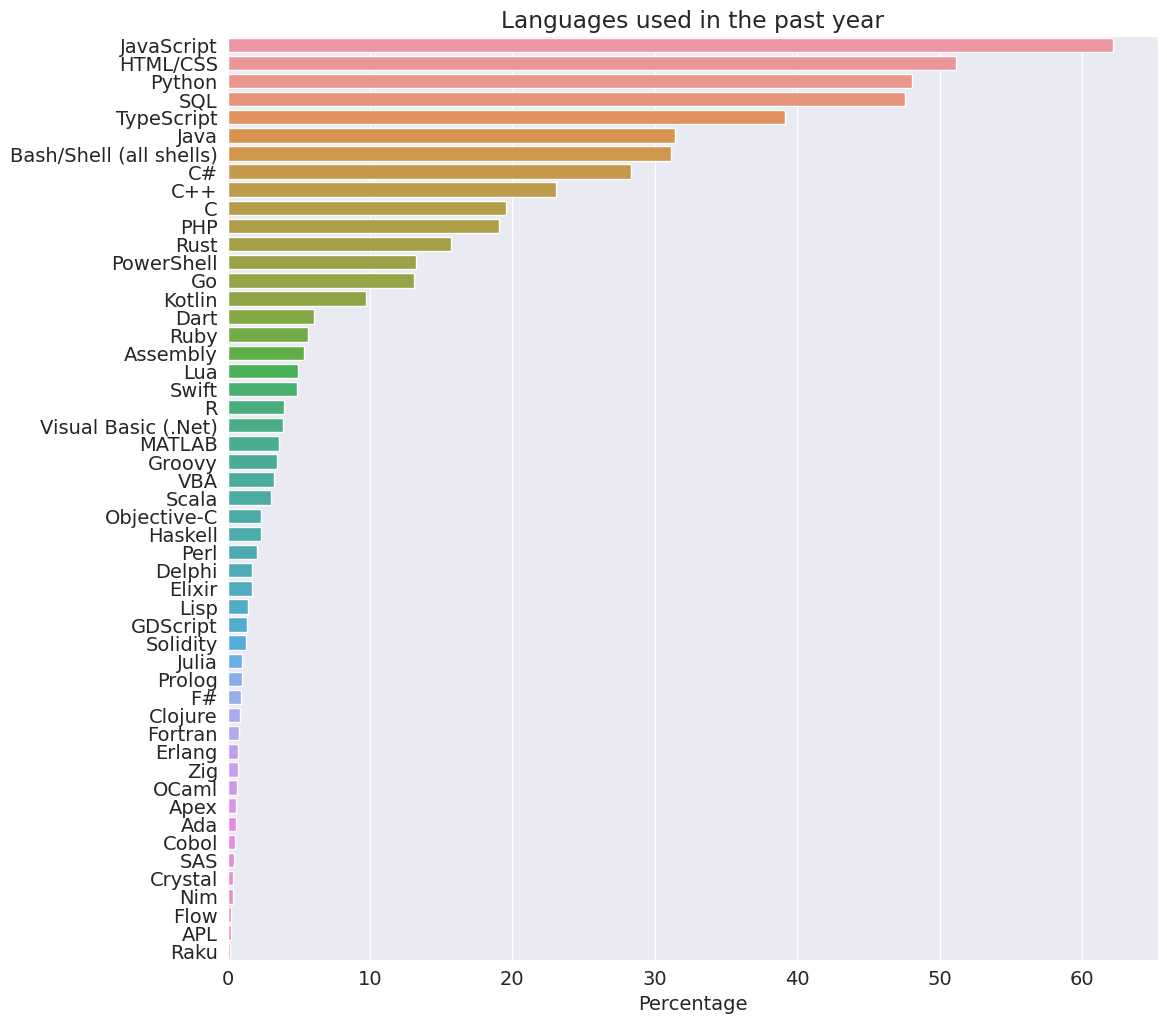

In [106]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('Percentage');

Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. Python seems to be popular because that's the third most commonly-used language.
Professional developers top three technologies are the same as last year—JavaScript, HTML/CSS, and SQL.

 Q2: What are the most popular Databases in 2023?

 we can use the DatabaseHaveWorkedWith column, respondents were allowed to choose multiple options here.

In [107]:
schema_name['question'][27]

'Which <b>database environments </b>have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the database and want to continue to do so, please check both boxes in that row.)'

In [108]:
survey_df.DatabaseHaveWorkedWith.value_counts()

PostgreSQL                                                                                                                    883
Microsoft SQL Server                                                                                                          657
MySQL                                                                                                                         589
SQLite                                                                                                                        476
MongoDB                                                                                                                       324
                                                                                                                             ... 
Cosmos DB;MariaDB;Microsoft Access;Microsoft SQL Server;MongoDB;MySQL;PostgreSQL;SQLite                                         1
Cassandra;Couch DB;MongoDB;PostgreSQL;Redis;TiDB                                          

Respondents chose multiple columns, so we need to seperate columnn using the split_column function here also.

In [109]:
Database_worked_df = split_multicolumn(survey_df.DatabaseHaveWorkedWith)
Database_worked_df

<ipython-input-91-26a445763b0d>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value  in col_series[col_series.notnull()].iteritems():


,Supabase,PostgreSQL,Redis,BigQuery,Elasticsearch,MongoDB,Cloud Firestore,MariaDB,Microsoft SQL Server,MySQL,...,Solr,Cockroachdb,Snowflake,Couch DB,RavenDB,Neo4J,Clickhouse,DuckDB,TiDB,Couchbase
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17672,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17673,False,True,False,False,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
17674,False,True,True,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
17675,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 32 databases were included among the options. i aggregate these to identify the percentage of respondents who selected each language.

In [110]:
Databases_worked_percentages=Database_worked_df.mean().sort_values(ascending=False)*100
Databases_worked_percentages

PostgreSQL                    40.668665
MySQL                         35.469820
SQLite                        27.289698
Microsoft SQL Server          22.022968
MongoDB                       21.955083
Redis                         18.628727
MariaDB                       15.653109
Elasticsearch                 12.683148
Oracle                         8.383776
Dynamodb                       7.970810
Firebase Realtime Database     5.283702
Cloud Firestore                4.927307
BigQuery                       3.841150
H2                             3.315042
Microsoft Access               3.264129
Cosmos DB                      3.066131
InfluxDB                       2.596594
Supabase                       2.262827
Cassandra                      2.240199
Snowflake                      1.849861
Neo4J                          1.725406
Solr                           1.470838
IBM DB2                        1.380325
Clickhouse                     1.046558
Couch DB                       0.961702


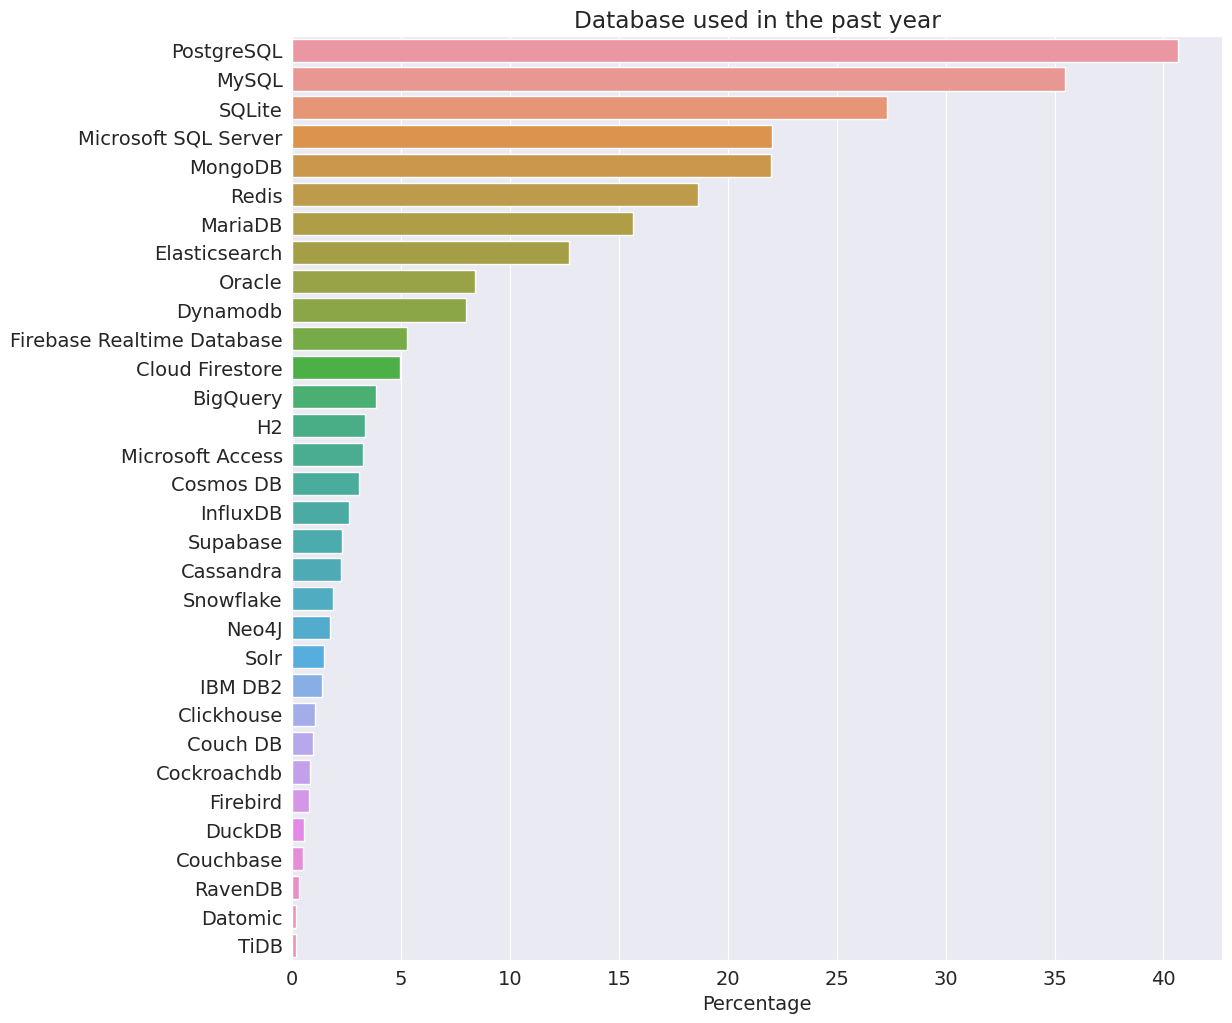

In [111]:
plt.figure(figsize=(12, 12))
sns.barplot(x=Databases_worked_percentages, y=Databases_worked_percentages.index)
plt.title("Database used in the past year");
plt.xlabel('Percentage');

This year, PostgreSQL took over the first place spot from MySQL because Professional Developers are more likely to use use PostgreSQL and those learning to code are more likely to use MySQL.

# **Inferences and Conclusions**

We've drawn many inferences from the survey. Here's a summary of a few of them:


* Based on the survey respondents' demographics, we can infer that the survey is
somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries. i.e the survey tends to have some selection bias.

* Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

* A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

* Javascript & HTML/CSS are the most used programming languages in 2023, closely followed by python & SQL.

* PostgreSQL & mySQL are the most used databases in 2023.

* You can learn and start programming professionally at any age.

* Full-stack, back-end, front-end, and desktop/enterprise app developers continue to account for the majority of all respondents(developertype).

* Most programmers are individual contributors and are in the IT industry (49%), followed by financial services and supply chain.